<a href="https://colab.research.google.com/github/Hassanahmed-15/Three-Phase-Fault-detection-system-/blob/main/three_phase_fault_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv("FAULT_CATEGORY_DATASET.csv")

X = df[["Ia","Ib","Ic","Va","Vb","Vc"]]
y = df["Fault_Category"]

# ------------------------------------------------------------
# TRAIN TEST SPLIT
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ------------------------------------------------------------
# SCALING
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       186

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



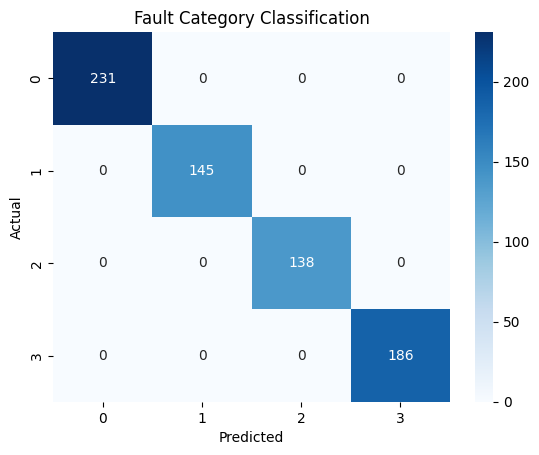


Predicted Category: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
rf = RandomForestClassifier(n_estimators=350, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.08)

model = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    voting='soft'
)

model.fit(X_train, y_train)

# ------------------------------------------------------------
# EVALUATION
# ------------------------------------------------------------
pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# CONFUSION MATRIX
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fault Category Classification")
plt.show()

# ------------------------------------------------------------
# PREDICT NEW SAMPLE (EDIT VALUES)
# ------------------------------------------------------------

example = np.array([[5,5,5,260,260,260]])  # No Fault example
example = scaler.transform(example)

print("\nPredicted Category:", model.predict(example)[0])

Model Accuracy on Wild Test Dataset: 95.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91        10
           3       1.00      0.80      0.89        10

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



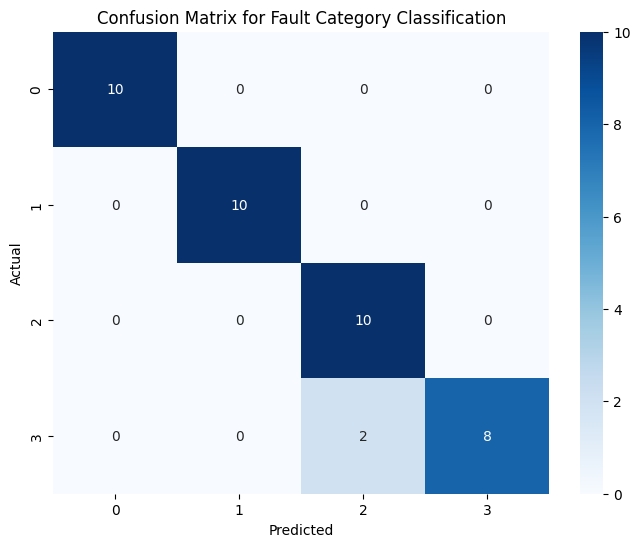

In [14]:
# ============================================================
#   TESTING THE MODEL WITH WILD TEST DATASET
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) LOAD THE WILD TEST DATASET
# ------------------------------------------------------------
test_df = pd.read_csv("/content/wild_test_dataset.csv")

X_test = test_df[["Ia", "Ib", "Ic", "Va", "Vb", "Vc"]]
y_test = test_df["Fault_Category"]

# ------------------------------------------------------------
# 2) PREPROCESS THE TEST DATASET (SCALING)
# ------------------------------------------------------------
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# ------------------------------------------------------------
# 3) LOAD THE TRAINED MODEL (FROM PREVIOUS CODE)
# ------------------------------------------------------------

# You should have saved the model from the previous code.
# Example: You can use the `model` object that was trained before.
# If you saved the model, load it here (this is just an example):

# from joblib import load
# model = load("trained_model.joblib")  # If you saved it as a .joblib file

# Since the model is already trained in the previous code, you can just use `model` directly.

# ------------------------------------------------------------
# 4) MAKE PREDICTIONS ON THE TEST DATASET
# ------------------------------------------------------------
y_pred = model.predict(X_test_scaled)

# ------------------------------------------------------------
# 5) EVALUATE THE MODEL'S PERFORMANCE
# ------------------------------------------------------------

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Wild Test Dataset: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix for Fault Category Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

